In [1]:
# imports

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns 
import pandas as pd
import numpy as np
from collections import defaultdict
mpl.rcParams['figure.dpi'] = 120  # make plots bigger by default

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import linear_model
from sklearn import model_selection

/Users/cchandler/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/cchandler/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/cchandler/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/cchandler/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/cchandler/anaconda3/lib/python3.7/_collections_abc.py:841: Matplotlib

In [2]:
# import wdbc.data

dataframe = pd.read_csv('wdbc.data')
dataframe.columns = ['ID number', 
                     'Diagnosis', 
                     'Mean Radius', 
                     'Mean Texture', 
                     'Mean Perimeter', 
                     'Mean Area',
                     'Mean Smoothness',
                     'Mean Compactness',
                     'Mean Concavity',
                     'Mean Concave Points',
                     'Mean Symmetry',
                     'Mean Fractal Dimension',
                     'SE Radius', 
                     'SE Texture', 
                     'SE Perimeter', 
                     'SE Area',
                     'SE Smoothness',
                     'SE Compactness',
                     'SE Concavity',
                     'SE Concave Points',
                     'SE Symmetry',
                     'SE Fractal Dimension',
                     'Worst Radius', 
                     'Worst Texture', 
                     'Worst Perimeter', 
                     'Worst Area',
                     'Worst Smoothness',
                     'Worst Compactness',
                     'Worst Concavity',
                     'Worst Concave Points',
                     'Worst Symmetry',
                     'Worst Fractal Dimension',
                    ]
dataframe.head()

,ID number,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Text(0, 0.5, 'Mean Radius')

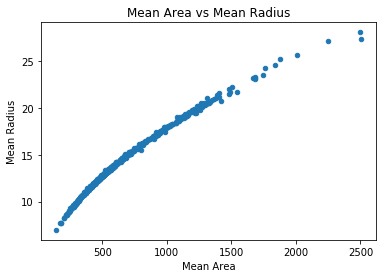

In [3]:
# plot

dataframe.plot.scatter('Mean Area', 'Mean Radius')
plt.title('Mean Area vs Mean Radius')
plt.ylabel('Mean Radius')


In [4]:
# splitting the dataframes by malignant data and benign data

df_M = dataframe.loc[dataframe['Diagnosis'] == 'M']

df_B = dataframe.loc[dataframe['Diagnosis'] == 'B']


In [5]:
# accounts of malignant cases
df_M.shape[0]

211

In [6]:
# accounts of benign cases
df_B.shape[0]

357

Text(0.5, 1.0, 'The number of Malignant Cases (1) VS Benign Cases (0)')

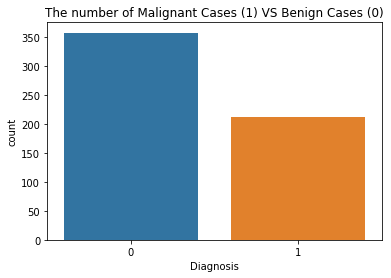

In [58]:
# barplot to visually compare the number of malignant cases vs the number of benign cases 
sns.countplot(data = dataframe, x = 'Diagnosis')
plt.title('The number of Malignant Cases (1) VS Benign Cases (0)')

# There are more cases of benign tumors than malignant tumors so although not equal, the amount of malignant cases vs benign cases is not 99% vs 1%.

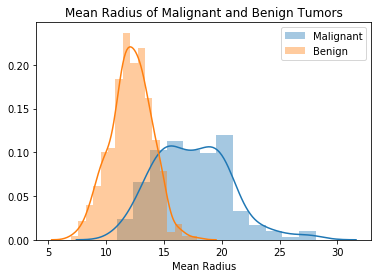

In [7]:
# plotting Mean Radius

sns.distplot(df_M['Mean Radius'], label = 'Malignant')
sns.distplot(df_B['Mean Radius'], label = 'Benign')
plt.title('Mean Radius of Malignant and Benign Tumors')
plt.legend()


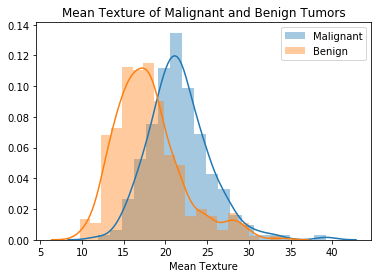

In [8]:
# ploting Mean Texture

sns.distplot(df_M['Mean Texture'], label = 'Malignant')
sns.distplot(df_B['Mean Texture'], label = 'Benign')
plt.title('Mean Texture of Malignant and Benign Tumors')
plt.legend()

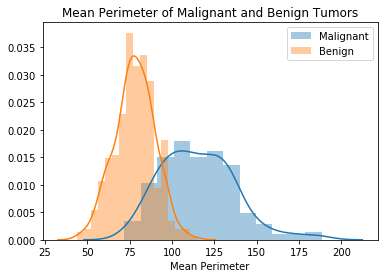

In [9]:
# ploting Mean Perimeter

sns.distplot(df_M['Mean Perimeter'], label = 'Malignant')
sns.distplot(df_B['Mean Perimeter'], label = 'Benign')
plt.title('Mean Perimeter of Malignant and Benign Tumors')
plt.legend()

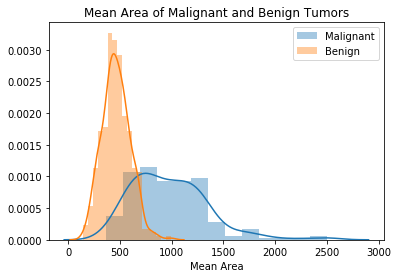

In [10]:
# ploting Mean Area

sns.distplot(df_M['Mean Area'], label = 'Malignant')
sns.distplot(df_B['Mean Area'], label = 'Benign')
plt.title('Mean Area of Malignant and Benign Tumors')
plt.legend()

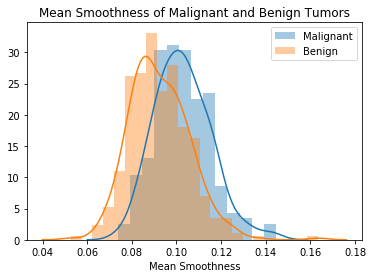

In [11]:
# ploting Mean Smoothness

sns.distplot(df_M['Mean Smoothness'], label = 'Malignant')
sns.distplot(df_B['Mean Smoothness'], label = 'Benign')
plt.title('Mean Smoothness of Malignant and Benign Tumors')
plt.legend()

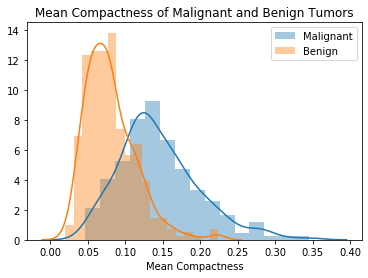

In [12]:
# ploting Mean Compactness

sns.distplot(df_M['Mean Compactness'], label = 'Malignant')
sns.distplot(df_B['Mean Compactness'], label = 'Benign')
plt.title('Mean Compactness of Malignant and Benign Tumors')
plt.legend()

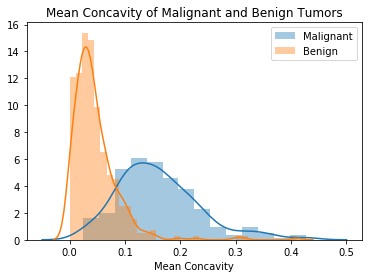

In [13]:
# ploting Mean Concavity

sns.distplot(df_M['Mean Concavity'], label = 'Malignant')
sns.distplot(df_B['Mean Concavity'], label = 'Benign')
plt.title('Mean Concavity of Malignant and Benign Tumors')
plt.legend()

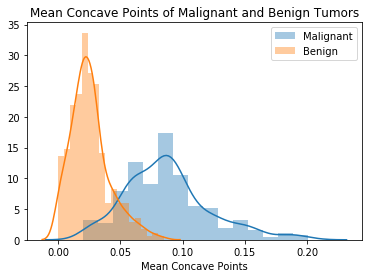

In [14]:
# ploting Mean Concave Points

sns.distplot(df_M['Mean Concave Points'], label = 'Malignant')
sns.distplot(df_B['Mean Concave Points'], label = 'Benign')
plt.title('Mean Concave Points of Malignant and Benign Tumors')
plt.legend()

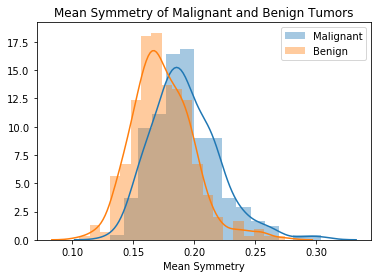

In [15]:
# ploting Mean Symmetry

sns.distplot(df_M['Mean Symmetry'], label = 'Malignant')
sns.distplot(df_B['Mean Symmetry'], label = 'Benign')
plt.title('Mean Symmetry of Malignant and Benign Tumors')
plt.legend()

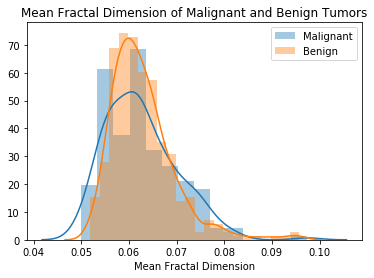

In [16]:
# ploting Mean Fractal Dimension

sns.distplot(df_M['Mean Fractal Dimension'], label = 'Malignant')
sns.distplot(df_B['Mean Fractal Dimension'], label = 'Benign')
plt.title('Mean Fractal Dimension of Malignant and Benign Tumors')
plt.legend()

In [17]:
# Correlation

df1 = dataframe.iloc[:, 2:12] # saving only the 'mean' data from the entire dataframe

corr = df1.corr()

corr.style.background_gradient(cmap = 'coolwarm') # making the heatmap -> red = highly correlated, blue = low correlation


,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension
Mean Radius,1,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,0.144236,-0.317749
Mean Texture,0.329383,1,0.335918,0.326193,-0.017769,0.252038,0.315248,0.30559,0.0801457,-0.0687715
Mean Perimeter,0.997876,0.335918,1,0.986548,0.204505,0.555676,0.715662,0.851338,0.1791,-0.268103
Mean Area,0.987344,0.326193,0.986548,1,0.174838,0.497981,0.686232,0.824246,0.148219,-0.28856
Mean Smoothness,0.168094,-0.017769,0.204505,0.174838,1,0.657741,0.519002,0.551009,0.555259,0.582435
Mean Compactness,0.505129,0.252038,0.555676,0.497981,0.657741,1,0.881619,0.82905,0.598095,0.560161
Mean Concavity,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1,0.920462,0.495525,0.329768
Mean Concave Points,0.823165,0.30559,0.851338,0.824246,0.551009,0.82905,0.920462,1,0.457171,0.158464
Mean Symmetry,0.144236,0.0801457,0.1791,0.148219,0.555259,0.598095,0.495525,0.457171,1,0.475301
Mean Fractal Dimension,-0.317749,-0.0687715,-0.268103,-0.28856,0.582435,0.560161,0.329768,0.158464,0.475301,1


In [65]:
# build a multivariate regression model to predict malignancy/benign cases based on Mean radius and Mean concave points

clf = linear_model.LogisticRegression(C = 1e8) # C = 1e8 -> regularization
clf.fit(dataframe[['Mean Radius', 'Mean Concave Points']], dataframe['Diagnosis']) 
print(clf.intercept_, clf.coef_)

[-13.69152231] [[ 0.63863492 84.15692588]]


/Users/cchandler/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
# determine how well the multivariate logistic model worked on the training set
clf.score(dataframe[['Mean Radius', 'Mean Concave Points']], dataframe['Diagnosis'])

0.9172535211267606

# Looking at the histograms, heavy overlap between the malignant and benign tumors is not desired as they do not provide insight/correlation as to if the tumor is malignant or benign. For example 'Mean Fractal Dimension' and 'Mean Symmetry' are ones with high overlap between malignant and benign tumor data.

# Looking at the heatmap, there are some really strong correlations and at least one should be removed in order to declutter the machine learning model. Removing one set will not affect the rest of the data too much as you still have other sets that were heavily correlated to the set that was removed. So I would consider removing either 'Mean Radius' or 'Mean Perimeter' or 'Mean Concave Points' as these are highly correlated.

In [67]:
# Cross Validation compares the train and test/generalization error when predicting malignancy with 
# mean radius and mean concave points

cross_validation = model_selection.cross_val_score(clf, dataframe[['Mean Radius', 'Mean Concave Points']], dataframe['Diagnosis'], cv = 20)
print(cross_validation.mean()) 
print(cross_validation.std())

0.9158068783068783
0.06790710153353907


/Users/cchandler/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cchandler/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cchandler/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cchandler/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cchandler/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

In [41]:
# Random Forest Classifier - extracting y -> the diagnosis

y = dataframe['Diagnosis']
df2 = dataframe.drop(['Diagnosis'], axis = 1)


In [42]:
# Random Forest Classifier

clf = RandomForestClassifier()

In [43]:
# Parameters for cross validation

parameters = {
    'n_estimators': [6, 8, 10, 12], # number of trees in the forest
    'max_features': ['sqrt', 'log2'], # the number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy'], # measures the quality of a split
    'max_depth': [2, 3, 5, 10, None], # maximum depth of a tress
    'min_samples_split': [2, 3, 5], # the minimum number of samples requried to split an internal node
    'min_samples_leaf': [1,5,10] # min number of samples required to be at a leaf node
}

In [46]:
# Search for best parameters using crossvalidation. `cv=3` means 3-fold crossvalidation
# the parameters selected are those that maximize the score of the left out data
cv = GridSearchCV(clf, parameters, cv = 3)
cv.fit(df2[['Mean Radius', 'Mean Concave Points']] , y) # runs fit with all sets of parameters

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [44]:
# Best parameters -> best result on hold out data
cv.best_params_

# Best scores 
cv.best_score_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 6}

In [50]:
# Create test train split 

# selecting every other column to be the training data 
# selecting overy other column to be the testing data
X_train = df2[['Mean Radius', 'Mean Concave Points']][1::2]
X_test = df2[['Mean Radius', 'Mean Concave Points']][::2]
y_train = y[1::2]
y_test = y[::0]

In [60]:
# Initialize classifier using best parameters
clf_tree = RandomForestClassifier(**cv.best_params_)

# fit/train it on the training data

clf_tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
# predict y values from X_test 

y_predict = clf_tree.predict(X_test)

In [62]:
# accuracy score of predicted y values

accuracy_score(y_predict, y_test)

0.9122807017543859

In [63]:
# Cross Validation compares the train and test/generalization error when predicting malignancy with 
# mean radius and mean concave points

cross_validation = model_selection.cross_val_score(clf_tree, dataframe[['Mean Radius', 'Mean Concave Points']], dataframe['Diagnosis'], cv = 20)
print(cross_validation.mean())
print(cross_validation.std())

0.9087826126619231
0.07152296527310967


In [54]:
# features -> returns feature importances, higher = more important
features = clf.feature_importances_

Text(0.5, 0, 'Feature')

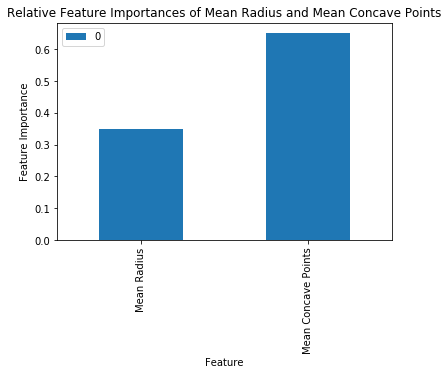

In [57]:
# bar plot of relative feature importances of each feature
# feature importances accessed with `clf.feature_importances_` 
# column names: `data_encoded.columns`
columns = df1.columns[0::7]
pd.DataFrame(features, index = columns).plot.bar()

plt.title('Relative Feature Importances of Mean Radius and Mean Concave Points')
plt.ylabel('Feature Importance')
plt.xlabel('Feature')

# After applying a cross validation to the multivariate logistic regression for Mean Radius and Mean Concave Points, the mean was ~ 0.9158068783068783 and the standard deviation was ~ 0.06790710153353907. The score of the cross validation was ~ 0.9137323943661971 which means the model worked fairly well on the training data

# A cross validation was applied to the Random Forest Classifier and the mean was ~ 0.9087826126619231 and the standard deviation was ~ 0.07152296527310967.  The accuracy score of the random forest classifier is ~ 0.9122807017543859 which means the model was able to accurately predict the diagnosis based on the diagnosis test data.

# Both the multivariate logistic regression and the random forest classifier are high indicating that both machine learning models are fairly accurate.
